## Import News Articles into Jupyter Notebook

This project demonstrates how you can use sentiment analysis from news articles to build a trading strategy

In [1]:
import pandas as pd

df = pd.read_csv('google_news_bitcoin_2020-01-01_2022-12-31.csv', parse_dates=True, index_col='datetime').sort_index()
df = df.iloc[:,1:-1]
df = df.loc['2020-01-01':'2023-01-01']
df.columns = ['article_title']
df

,article_title
datetime,
2020-01-01 08:00:00+00:00,Worst Bitcoin Price Prediction of 2019
2020-01-01 08:00:00+00:00,Bitcoin: 4 Big Competitive Advantages Over Alt...
2020-01-01 08:00:00+00:00,"From crypto currency to chocolate, where to sp..."
2020-01-01 08:00:00+00:00,"Bitcoin Price Will Crash Below $1k in 2020, Ze..."
2020-01-03 08:00:00+00:00,Happy birthday Bitcoin! Celebrating the life o...
...,...
2022-12-29 08:00:00+00:00,Will This Country Be the Next to Make Bitcoin ...
2022-12-30 08:00:00+00:00,What Do Bitcoin Investors Need To Know In Thes...
2022-12-30 08:00:00+00:00,Billionaire Mark Cuban Reveals When He’d Buy B...


## Preprocessing for Sentiment Analysis

In [ ]:
before running our sentiment analysis, we must clean the data to give most accurate results

In [2]:
import re
from contractions import fix
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def normalize_text(article):
    # remove non-English characters 
    article = re.sub(r'[^\x00-\x7F]+', "", article)
    # remove numbers
    article = re.sub(r"\d+", "", article)
    # fix contractions
    article = fix(article)
    # stem words
    ss = SnowballStemmer("english")
    tokens = word_tokenize(article)
    tokens = [ss.stem(token) for token in tokens]
    # remove stop words
    stop_words = set([word for word in stopwords.words('english') if word != 'not'])
    tokens = [token for token in tokens if not token in stop_words]
    # join tokens back into a single string
    article = " ".join(tokens)
    return article

normalized_article = []

for title in df.article_title:
    result = normalize_text(title)
    normalized_article.append(result)

df['article_title_normalized'] = normalized_article
df

,article_title,article_title_normalized
datetime,,
2020-01-01 08:00:00+00:00,Worst Bitcoin Price Prediction of 2019,worst bitcoin price predict
2020-01-01 08:00:00+00:00,Bitcoin: 4 Big Competitive Advantages Over Alt...,bitcoin : big competit advantag altcoin
2020-01-01 08:00:00+00:00,"From crypto currency to chocolate, where to sp...","crypto currenc chocol , spend bitcoin"
2020-01-01 08:00:00+00:00,"Bitcoin Price Will Crash Below $1k in 2020, Ze...","bitcoin price crash $ k , zengo ceo joke predict"
2020-01-03 08:00:00+00:00,Happy birthday Bitcoin! Celebrating the life o...,happi birthday bitcoin ! celebr life remark -y...
...,...,...
2022-12-29 08:00:00+00:00,Will This Country Be the Next to Make Bitcoin ...,countri next make bitcoin offici currenc ?
2022-12-30 08:00:00+00:00,What Do Bitcoin Investors Need To Know In Thes...,bitcoin investor need know frozen market ?
2022-12-30 08:00:00+00:00,Billionaire Mark Cuban Reveals When He’d Buy B...,billionair mark cuban reveal would buy bitcoin...


## Calculate Sentiment

We use vaders sentiment analyser to score the cleaned article title. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

One of the biggest advantages of VADER is that it does not require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon. 


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

df['sentiment'] = df['article_title_normalized'].apply(get_sentiment)
df

,article_title,article_title_normalized,sentiment
datetime,,,
2020-01-01 08:00:00+00:00,Worst Bitcoin Price Prediction of 2019,worst bitcoin price predict,-0.6249
2020-01-01 08:00:00+00:00,Bitcoin: 4 Big Competitive Advantages Over Alt...,bitcoin : big competit advantag altcoin,0.0000
2020-01-01 08:00:00+00:00,"From crypto currency to chocolate, where to sp...","crypto currenc chocol , spend bitcoin",0.0000
2020-01-01 08:00:00+00:00,"Bitcoin Price Will Crash Below $1k in 2020, Ze...","bitcoin price crash $ k , zengo ceo joke predict",-0.1280
2020-01-03 08:00:00+00:00,Happy birthday Bitcoin! Celebrating the life o...,happi birthday bitcoin ! celebr life remark -y...,0.0000
...,...,...,...
2022-12-29 08:00:00+00:00,Will This Country Be the Next to Make Bitcoin ...,countri next make bitcoin offici currenc ?,0.0000
2022-12-30 08:00:00+00:00,What Do Bitcoin Investors Need To Know In Thes...,bitcoin investor need know frozen market ?,0.0000
2022-12-30 08:00:00+00:00,Billionaire Mark Cuban Reveals When He’d Buy B...,billionair mark cuban reveal would buy bitcoin...,0.3182


## Sum Daily Polarity

For my back test, I will be using daily btc price data and therefore I need to resample to sentiment data to match. The sentiment for each day will be summed, for example, if I have 3 articles with polarity, 0.1, -0.3, 0.9, the polarity for that day will be the summed total, 0.7. The total dataframe size has been reduced from 5437 to 1096 as a result of this change. 

In [4]:
polarity_sum = df[['sentiment']].resample('1D').sum()
polarity_sum

,sentiment
datetime,
2020-01-01 00:00:00+00:00,-0.7529
2020-01-02 00:00:00+00:00,0.0000
2020-01-03 00:00:00+00:00,0.0000
2020-01-04 00:00:00+00:00,0.3612
2020-01-05 00:00:00+00:00,0.5562
...,...
2022-12-27 00:00:00+00:00,0.3187
2022-12-28 00:00:00+00:00,-0.6364
2022-12-29 00:00:00+00:00,0.3612


## Get BTC Returns

Now time to import btc price data for the same time interval and calculate the log returns.

In [5]:
#import btc returns data
import datetime
import yfinance as yf
import numpy as np

def get_market_data(ticker, start_date, end_date, interval):
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval, group_by='ticker', ignore_tz = False)
    data["returns"] = np.log(data.Close / data.Close.shift(1))
    return data[["returns"]]

end_date = '2022-12-31'
start_date = '2020-01-01'
interval = '1D'

df_btc = get_market_data("BTC-USD", start_date, end_date, interval)
df_btc.index = df_btc.index.tz_localize('UTC')
df_btc

[*********************100%***********************]  1 of 1 completed


,returns
Date,
2020-01-01 00:00:00+00:00,NaN
2020-01-02 00:00:00+00:00,-0.030273
2020-01-03 00:00:00+00:00,0.050172
2020-01-04 00:00:00+00:00,0.008915
2020-01-05 00:00:00+00:00,0.000089
...,...
2022-12-27 00:00:00+00:00,-0.012048
2022-12-28 00:00:00+00:00,-0.009895
2022-12-29 00:00:00+00:00,0.005409


## Join Dataframes

In [6]:
data = polarity_sum.join(df_btc)
data

,sentiment,returns
datetime,,
2020-01-01 00:00:00+00:00,-0.7529,NaN
2020-01-02 00:00:00+00:00,0.0000,-0.030273
2020-01-03 00:00:00+00:00,0.0000,0.050172
2020-01-04 00:00:00+00:00,0.3612,0.008915
2020-01-05 00:00:00+00:00,0.5562,0.000089
...,...,...
2022-12-27 00:00:00+00:00,0.3187,-0.012048
2022-12-28 00:00:00+00:00,-0.6364,-0.009895
2022-12-29 00:00:00+00:00,0.3612,0.005409


## Calculate Strategy Returns

In [7]:
col_names = ['sentiment']

for col in col_names:
    data[col + '_position'] = np.where(data[col] > 0, 1, np.nan)
    data[col + '_position'] = np.where(data[col] == 0, 0, data[col + '_position'])
    data[col + '_position'] = np.where(data[col] < 0, -1, data[col + '_position'])
    data[col + '_position'] = data[col + '_position'].ffill()
    data[col + '_strategy'] = data['returns'] * data[col + '_position'].shift(1)
    data['creturns'] = data["returns"].cumsum().apply(np.exp)
    data[col + '_cstrategy'] = data[col + "_strategy"].cumsum().apply(np.exp)
    data[col + "_long_price"] = data.creturns[data[col + '_position'].diff() == 2]
    data[col + "_short_price"] = data.creturns[data[col + '_position'].diff() == -2]

data

,sentiment,returns,sentiment_position,sentiment_strategy,creturns,sentiment_cstrategy,sentiment_long_price,sentiment_short_price
datetime,,,,,,,,
2020-01-01 00:00:00+00:00,-0.7529,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
2020-01-02 00:00:00+00:00,0.0000,-0.030273,0.0,0.030273,0.970181,1.030736,NaN,NaN
2020-01-03 00:00:00+00:00,0.0000,0.050172,0.0,0.000000,1.020098,1.030736,NaN,NaN
2020-01-04 00:00:00+00:00,0.3612,0.008915,1.0,0.000000,1.029233,1.030736,NaN,NaN
2020-01-05 00:00:00+00:00,0.5562,0.000089,1.0,0.000089,1.029325,1.030828,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,0.3187,-0.012048,1.0,0.012048,2.321773,27.532351,2.321773,NaN
2022-12-28 00:00:00+00:00,-0.6364,-0.009895,-1.0,-0.009895,2.298913,27.261261,NaN,2.298913
2022-12-29 00:00:00+00:00,0.3612,0.005409,1.0,-0.005409,2.311380,27.114212,2.311380,NaN


In [8]:
def ma(df, window_list):
    for window in window_list:
        df['ma_' + str(window)] = df.sentiment.rolling(window).mean()
    return df


window_list = [2,5,8,10]
df1 = ma(data[['sentiment']], window_list)

/var/folders/vr/yg4xsxp97jz9msq4chk2pdmh0000gn/T/ipykernel_2931/3866711219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma_' + str(window)] = df.sentiment.rolling(window).mean()
/var/folders/vr/yg4xsxp97jz9msq4chk2pdmh0000gn/T/ipykernel_2931/3866711219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma_' + str(window)] = df.sentiment.rolling(window).mean()
/var/folders/vr/yg4xsxp97jz9msq4chk2pdmh0000gn/T/ipykernel_2931/3866711219.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [9]:
def ma(df, window_list):
    for window in window_list:
        df['sentiment_adj_' + str(window)] = df.sentiment.apply(lambda x: 0 if abs(x) < window else x)
    return df


window_list = [0.1,0.2,0.3,0.4,0.5]
ma(df1, window_list)

/var/folders/vr/yg4xsxp97jz9msq4chk2pdmh0000gn/T/ipykernel_2931/3984487942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_adj_' + str(window)] = df.sentiment.apply(lambda x: 0 if abs(x) < window else x)
/var/folders/vr/yg4xsxp97jz9msq4chk2pdmh0000gn/T/ipykernel_2931/3984487942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_adj_' + str(window)] = df.sentiment.apply(lambda x: 0 if abs(x) < window else x)


,sentiment,ma_2,ma_5,ma_8,ma_10,sentiment_adj_0.1,sentiment_adj_0.2,sentiment_adj_0.3,sentiment_adj_0.4,sentiment_adj_0.5
datetime,,,,,,,,,,
2020-01-01 00:00:00+00:00,-0.7529,NaN,NaN,NaN,NaN,-0.7529,-0.7529,-0.7529,-0.7529,-0.7529
2020-01-02 00:00:00+00:00,0.0000,-0.37645,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000
2020-01-03 00:00:00+00:00,0.0000,0.00000,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000
2020-01-04 00:00:00+00:00,0.3612,0.18060,NaN,NaN,NaN,0.3612,0.3612,0.3612,0.0000,0.0000
2020-01-05 00:00:00+00:00,0.5562,0.45870,0.03290,NaN,NaN,0.5562,0.5562,0.5562,0.5562,0.5562
...,...,...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,0.3187,-0.09595,0.02518,-0.034062,-0.02725,0.3187,0.3187,0.3187,0.0000,0.0000
2022-12-28 00:00:00+00:00,-0.6364,-0.15885,-0.22930,-0.023925,-0.09089,-0.6364,-0.6364,-0.6364,-0.6364,-0.6364
2022-12-29 00:00:00+00:00,0.3612,-0.13760,-0.09342,-0.033825,-0.05477,0.3612,0.3612,0.3612,0.0000,0.0000


In [10]:
data[['creturns', 'sentiment_cstrategy']]

,creturns,sentiment_cstrategy
datetime,,
2020-01-01 00:00:00+00:00,NaN,NaN
2020-01-02 00:00:00+00:00,0.970181,1.030736
2020-01-03 00:00:00+00:00,1.020098,1.030736
2020-01-04 00:00:00+00:00,1.029233,1.030736
2020-01-05 00:00:00+00:00,1.029325,1.030828
...,...,...
2022-12-27 00:00:00+00:00,2.321773,27.532351
2022-12-28 00:00:00+00:00,2.298913,27.261261
2022-12-29 00:00:00+00:00,2.311380,27.114212


## Plot Results

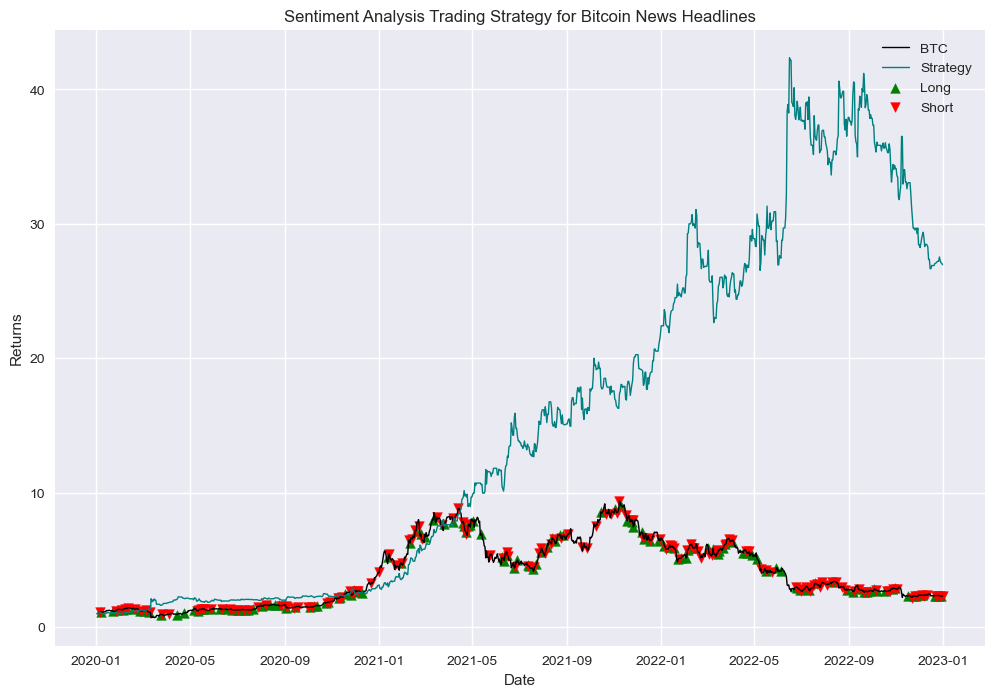

In [11]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

def plot_strat(df, col_name):
    fig, ax1 = plt.subplots(figsize=(12,8))
    title = "Sentiment Analysis Trading Strategy for Bitcoin News Headlines"

    creturns = ax1.plot(df.creturns, color='black', linewidth=1, label='BTC')
    cstrategy = ax1.plot(df[col_name + '_cstrategy'], color='teal', linewidth=1, label='Strategy')
    buy_signal = ax1.scatter(df.index , df[col_name + '_long_price'] , label = 'Long' , marker = '^', color = 'green',alpha =1 )
    sell_signal = ax1.scatter(df.index , df[col_name + '_short_price'] , label = 'Short' , marker = 'v', color = 'red',alpha =1 )

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Returns')
    ax1.title.set_text(title)

    ax1.legend()
    plt.show()
    
plot_strat(data, 'sentiment')